In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
fsclean = pd.read_csv('elenewcleanlabel.csv')
fsclean

,ulasan,rating,kategori,nama_produk,ulasan_tokenize,ulasan_normalized,ulasan_stop_removed,ulasan_Stemmed,ulasan_clean,label
0,berfungsi dengan baik,5,elektronik,Alfalink EI 212 - Kamus Elektronik,"['berfungsi', 'dengan', 'baik']","['berfungsi', 'dengan', 'baik']",['berfungsi'],['fungsi'],fungsi,2
1,seller fast response pengiriman cepat product ...,5,elektronik,Alfalink EI 212 - Kamus Elektronik,"['seller', 'fast', 'response', 'pengiriman', '...","['seller', 'fast', 'response', 'pengiriman', '...","['seller', 'fast', 'response', 'pengiriman', '...","['seller', 'fast', 'response', 'kirim', 'cepat...",seller fast response kirim cepat produk sesuai...,2
2,berfungsi dengan baik kualitas okey,5,elektronik,Alfalink EI 212 - Kamus Elektronik,"['berfungsi', 'dengan', 'baik', 'kualitas', 'o...","['berfungsi', 'dengan', 'baik', 'kualitas', 'o...","['berfungsi', 'kualitas', 'okey']","['fungsi', 'kualitas', 'okey']",fungsi kualitas okey,2
3,barang diterima dgn aman penjual juga ramah,5,elektronik,Alfalink EI 212 - Kamus Elektronik,"['barang', 'diterima', 'dgn', 'aman', 'penjual...","['barang', 'diterima', 'dengan', 'aman', 'penj...","['barang', 'diterima', 'aman', 'penjual', 'ram...","['barang', 'terima', 'aman', 'jual', 'ramah']",barang terima aman jual ramah,2
4,sesuai gambar respon cepat,5,elektronik,Alfalink EI 212 - Kamus Elektronik,"['sesuai', 'gambar', 'respon', 'cepat']","['sesuai', 'gambar', 'respon', 'cepat']","['sesuai', 'gambar', 'respon', 'cepat']","['sesuai', 'gambar', 'respon', 'cepat']",sesuai gambar respon cepat,2
...,...,...,...,...,...,...,...,...,...,...
22028,brg sudah sampai thankss,4,elektronik,Battery | Blackberry Battery Charger Bundle ...,"['brg', 'sudah', 'sampai', 'thankss']","['barang', 'sudah', 'sampai', 'thankss']","['barang', 'thankss']","['barang', 'thankss']",barang thankss,2
22029,nah kan jadi bisa kasih review respon cepat ka...,5,elektronik,Battery Charger | Blackberry Desktop Battery J...,"['nah', 'kan', 'jadi', 'bisa', 'kasih', 'revie...","['nah', 'kan', 'jadi', 'bisa', 'kasih', 'revie...","['kasih', 'review', 'respon', 'cepat', 'salah'...","['kasih', 'review', 'respon', 'cepat', 'salah'...",kasih review respon cepat salah toko webnya ya...,2
22030,mantab gan langsung ane pakemaknyus,5,elektronik,Battery Charger | Blackberry Desktop Battery J...,"['mantab', 'gan', 'langsung', 'ane', 'pakemakn...","['mantap', 'juragan', 'segera', 'saya', 'pakem...","['mantap', 'juragan', 'pakemaknyus']","['mantap', 'juragan', 'pakemaknyus']",mantap juragan pakemaknyus,2
22031,tq gan tq gan tq gan tq gan tq gan tq gan tq g...,5,elektronik,BLACKBERRY EBC or Desktop Battery ASY-34812-00...,"['tq', 'gan', 'tq', 'gan', 'tq', 'gan', 'tq', ...","['terima kasih', 'juragan', 'terima kasih', 'j...","['terima kasih', 'juragan', 'terima kasih', 'j...","['terima kasih', 'juragan', 'terima kasih', 'j...",terima kasih juragan terima kasih juragan teri...,2


In [3]:
Ulasan = fsclean['ulasan_clean']
Ulasan.isnull().sum()

119

In [4]:
Ulasan = fsclean.fillna('tidak ada komentar')

# split data 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fsclean['ulasan_clean'], fsclean['label'], 
                                                    test_size=0.3, stratify=fsclean['label'], random_state=30)

In [6]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Make sure to update labels accordingly

X_test = X_test.dropna()
y_test = y_test[X_test.index] 
# Check if there are still NaN values
print("NaN in X_train:", X_train.isnull().any())
print("NaN in X_test:", X_test.isnull().any())

NaN in X_train: False
NaN in X_test: False


# BOW

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Bag of Words (BoW) Vectorization
vectorizer = CountVectorizer(decode_error='replace', encoding='utf-8')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [8]:
print("Shape after BoW Vectorization:")
print("X_train_bow.shape:", X_train.shape)
print("X_test_bow.shape:", X_test.shape)

Shape after BoW Vectorization:
X_train_bow.shape: (15347, 7278)
X_test_bow.shape: (6567, 7278)


# RESAMPLING

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={1:2000, 0:2000})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

label
2    14301
1     2000
0     2000
Name: count, dtype: int64

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Menggunakan Random Under-sampling hanya pada kelas tertentu
under_sampler = RandomUnderSampler(sampling_strategy={2: 2000})
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)
y_train_resampled.value_counts()

label
0    2000
1    2000
2    2000
Name: count, dtype: int64

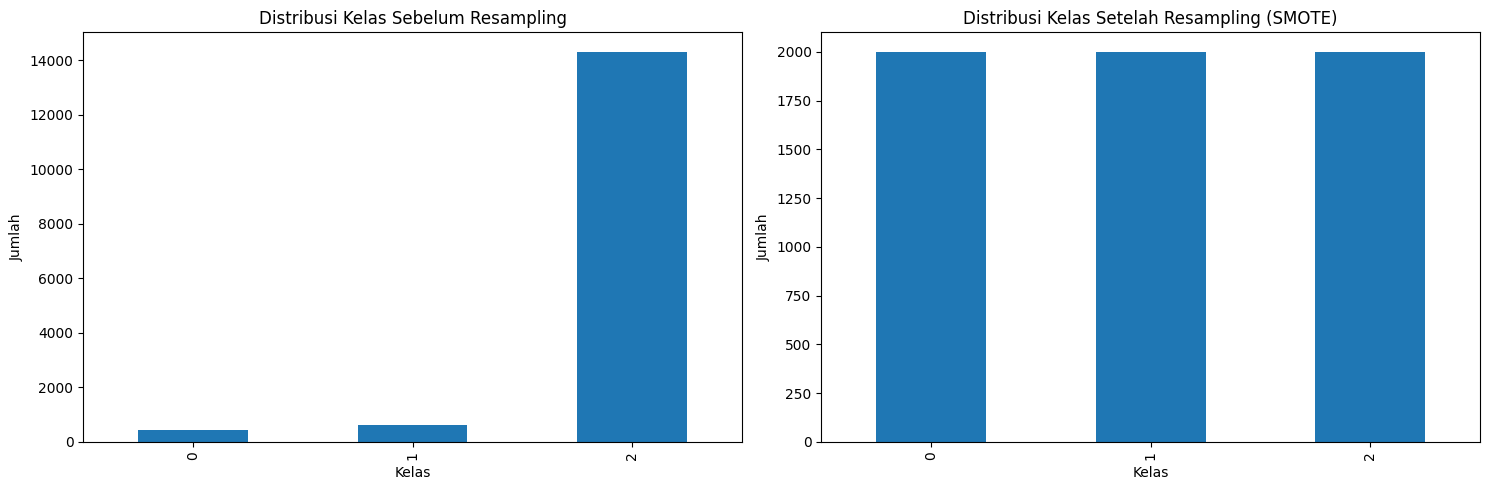

In [11]:
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas sebelum dan setelah resampling
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Setelah Resampling (SMOTE)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# MelakukanPrediksi

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Klasifikasi menggunakan Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)

# Evaluasi hasil klasifikasi Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.54      0.19       182
           1       0.07      0.42      0.12       262
           2       0.97      0.66      0.79      6123

    accuracy                           0.65      6567
   macro avg       0.39      0.54      0.37      6567
weighted avg       0.91      0.65      0.75      6567



In [13]:
# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_classifier.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.47      0.17       182
           1       0.07      0.31      0.12       262
           2       0.96      0.73      0.83      6123

    accuracy                           0.71      6567
   macro avg       0.38      0.51      0.38      6567
weighted avg       0.90      0.71      0.78      6567



In [14]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.55      0.16       182
           1       0.06      0.43      0.10       262
           2       0.97      0.57      0.72      6123

    accuracy                           0.57      6567
   macro avg       0.38      0.52      0.33      6567
weighted avg       0.91      0.57      0.68      6567



In [15]:
# Klasifikasi menggunakan Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)
nb_predictions = nb_classifier.predict(X_test)

# Evaluasi hasil klasifikasi Naive Bayes
print("Classification Report:\n", classification_report(y_test, nb_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.67      0.30       182
           1       0.15      0.34      0.20       262
           2       0.98      0.85      0.91      6123

    accuracy                           0.82      6567
   macro avg       0.44      0.62      0.47      6567
weighted avg       0.92      0.82      0.86      6567



In [16]:
# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_classifier.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.70      0.14       182
           1       0.05      0.46      0.08       262
           2       0.98      0.36      0.52      6123

    accuracy                           0.37      6567
   macro avg       0.37      0.51      0.25      6567
weighted avg       0.92      0.37      0.50      6567

